In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [25]:
#Load supporting data
dn = pd.read_csv("Data/de_novo_proteins_data.csv", index_col=0)

rd = pd.read_csv("Data/random_sequences_data.csv", index_col=0)

cons = pd.read_csv("Data/established_proteins_data.csv", index_col=0)
cons = cons[cons["isDeNovo"] == False]

#Load AFDB50 hits for de novo proteins after MD simulations & filter for highest scoring MD replicate
dn_after100ns = pd.read_csv("Data/denovo_AFDB50_bestHits_afterMD.csv", index_col=0)
dn_after100ns["replicate"] = dn_after100ns["id"].apply(lambda x: x.rsplit("_", 3)[2])
dn_after100ns["id"] = dn_after100ns["id"].apply(lambda x: x.rsplit("_", 3)[0])

dn_after100ns_filtered = pd.DataFrame(columns = ["id", "MD_replicate", "AFDB50_Tm_after100ns", "target", "denovo_coverage", "target_coverage"])
for id in dn_after100ns["id"].unique():
    selection = dn_after100ns[dn_after100ns["id"] == id]
    max_AFDB50_Tm = selection["AFDB50_highest_Tm"].max()
    selection = selection[selection["AFDB50_highest_Tm"] == max_AFDB50_Tm]
    dn_after100ns_filtered.loc[len(dn_after100ns_filtered)] = [id, selection["replicate"].values[0], max_AFDB50_Tm, selection["AFDB50_highest_Tm_ID"].values[0], selection["AFDB50_qcov"].values[0], selection["AFDB50_tcov"].values[0]]


#merge supporting data with foldseek hits
dn_foldseek_hits = pd.read_csv("Data/denovo_AFDB50_bestHits.csv", index_col=0)
rd_foldseek_hits = pd.read_csv("Data/random_AFDB50_bestHits.csv", index_col=0)
cons_foldseek_hits = pd.read_csv("Data/conserved_AFDB50_bestHits.csv", index_col=0)

dn = pd.merge(dn, dn_foldseek_hits, on="id", how="left")
dn = pd.merge(dn, dn_after100ns_filtered[["id", "AFDB50_Tm_after100ns", "target", "denovo_coverage", "target_coverage", "MD_replicate"]], on="id", how="left")
rd = pd.merge(rd, rd_foldseek_hits, on="id", how="left")
cons = pd.merge(cons, cons_foldseek_hits, on="id", how="left")

#Define filter

#disorder
dn = dn[(dn["fraction_disorder_fldpnn"] <= 0.3)]
rd = rd[(rd["fraction_disorder_fldpnn"] <= 0.3)]
cons = cons[(cons["fraction_disorder_fldpnn"] <= 0.3)]

#Single long helix filter
dn = dn[dn["alpha_content_AF"] <= 0.95]
rd = rd[rd["alpha_content_AF"] <= 0.95]
cons = cons[cons["alpha_content_AF"] <= 0.95]

In [26]:
#Replace missing TM values and values below 0.5 with 0.5, as TM = 0.5 is the cutoff for structural similarty
dn["AFDB50_highest_Tm"]  = dn["AFDB50_highest_Tm"].apply(lambda x: 0.5 if x < 0.5 else x)
dn["AFDB50_Tm_after100ns"]  = dn["AFDB50_Tm_after100ns"].apply(lambda x: 0.5 if x < 0.5 else x)
rd["AFDB50_highest_Tm"]  = rd["AFDB50_highest_Tm"].apply(lambda x: 0.5 if x < 0.5 else x)
cons["AFDB50_highest_Tm"]  = cons["AFDB50_highest_Tm"].apply(lambda x: 0.5 if x < 0.5 else x)

dn["AFDB50_highest_Tm"] = dn["AFDB50_highest_Tm"].fillna(0.5)
dn["AFDB50_Tm_after100ns"] = dn["AFDB50_Tm_after100ns"].fillna(0.5)
rd["AFDB50_highest_Tm"] = rd["AFDB50_highest_Tm"].fillna(0.5)
cons["AFDB50_highest_Tm"] = cons["AFDB50_highest_Tm"].fillna(0.5)


In [27]:
print(f"Novel structures before MD: {len(dn[dn['AFDB50_highest_Tm'] == 0.5])}")
print(f"Novel structures after MD: {len(dn[dn['AFDB50_Tm_after100ns'] == 0.5])}")

print(f"simlar structures before MD: {len(dn[dn['AFDB50_highest_Tm'] > 0.5])}")
print(f"simlar structures after MD: {len(dn[dn['AFDB50_Tm_after100ns'] > 0.5])}")

Novel structures before MD: 1082
Novel structures after MD: 1042
simlar structures before MD: 410
simlar structures after MD: 450


## Plot distributions of highest TM-scores for all proteins

/var/folders/9x/smcwc3jj20b87jkkkrgmlz7c0000gn/T/ipykernel_45657/2354668128.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax_dn.set_ylim(0, 1400)


Text(0.5, 1.0, '$\\it{de}$ $\\it{novo}$ Proteins')

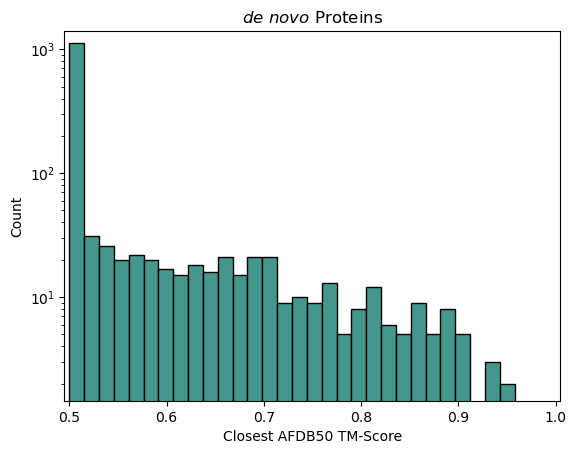

In [28]:
#De novo proteins before MD
dn_fig = plt.figure()
ax_dn = dn_fig.add_subplot()

ax_dn.hist(dn["AFDB50_highest_Tm"], color="#43978D", bins=30, edgecolor="black",)
ax_dn.set_ylabel("Count")
ax_dn.set_xlabel("Closest AFDB50 TM-Score")

ax_dn.set_xlim(0.495, 1.005)


ax_dn.semilogy()

ax_dn.set_ylim(0, 1400)

ax_dn.set_title(r"$\it{de}$ $\it{novo}$ Proteins")

/var/folders/9x/smcwc3jj20b87jkkkrgmlz7c0000gn/T/ipykernel_45657/1237296159.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax_dn_after100ns.set_ylim(0, 1400)


(0.7052921692347924, 1400)

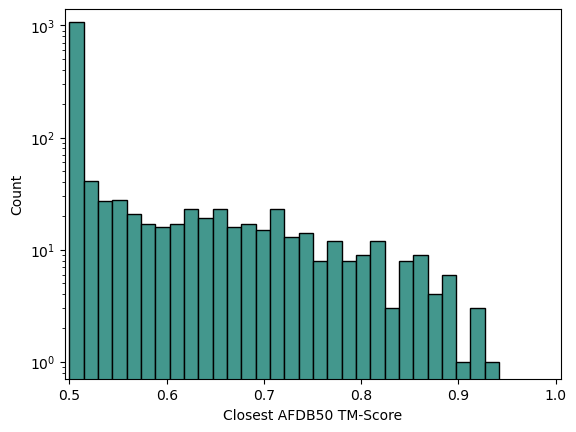

In [29]:
#De novo proteins after MD
dn_figure_after100ns = plt.figure()
ax_dn_after100ns = dn_figure_after100ns.add_subplot()

ax_dn_after100ns.hist(dn["AFDB50_Tm_after100ns"], color="#43978D", bins=30, edgecolor="black",)
ax_dn_after100ns.set_ylabel("Count")
ax_dn_after100ns.set_xlabel("Closest AFDB50 TM-Score")

ax_dn_after100ns.set_xlim(0.495, 1.005)


ax_dn_after100ns.semilogy()

ax_dn_after100ns.set_ylim(0, 1400)

/var/folders/9x/smcwc3jj20b87jkkkrgmlz7c0000gn/T/ipykernel_45657/1530503161.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax_rd.set_ylim(0, 1400)


Text(0.5, 1.0, 'Random Sequences')

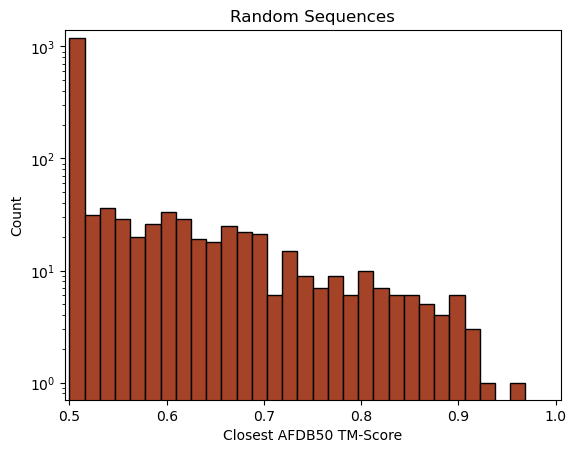

In [30]:
#Random proteins
rd_fig = plt.figure()
ax_rd = rd_fig.add_subplot()

ax_rd.hist(rd["AFDB50_highest_Tm"], color="#A44328", bins=30, edgecolor="black")
ax_rd.set_ylabel("Count")
ax_rd.set_xlabel("Closest AFDB50 TM-Score")

ax_rd.set_xlim(0.495, 1.005)

ax_rd.semilogy()

ax_rd.set_ylim(0, 1400)

ax_rd.set_title("Random Sequences")

/var/folders/9x/smcwc3jj20b87jkkkrgmlz7c0000gn/T/ipykernel_45657/285569851.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax_con.set_ylim(0, 1400)


Text(0.5, 1.0, 'Conserved Proteins')

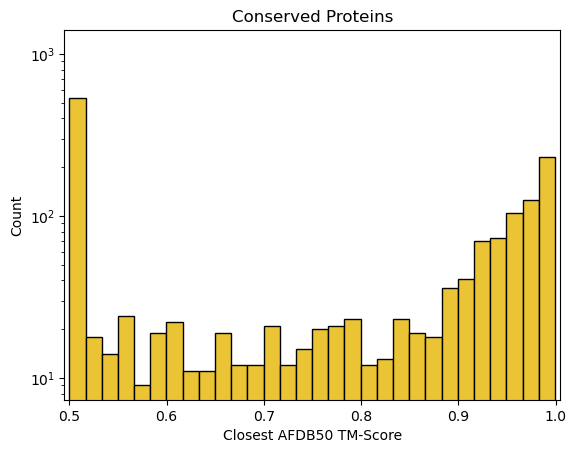

In [31]:
#Conserved proteins
con_fig  = plt.figure()
ax_con = con_fig.add_subplot()

ax_con.hist(cons["AFDB50_highest_Tm"], color="#EAC435", bins=30, edgecolor="black")
ax_con.set_ylabel("Count")
ax_con.set_xlabel("Closest AFDB50 TM-Score")

ax_con.set_xlim(0.495, 1.005)

ax_con.semilogy()

ax_con.set_ylim(0, 1400)

ax_con.set_title("Conserved Proteins")

# Structural classification of de novo proteins
### Infer structural classes from DSSP annotations of AlphaFold predictions

In [32]:
ecod_annotations = pd.read_csv("Data/denovo_ecod_alignment_afterMD.csv", index_col=0)

dn = pd.merge(dn, ecod_annotations, on="id", how="left")

all_alpha = dn[(dn["alpha_content_AF"] > 0) & (dn["beta_content_AF"] == 0)]
all_beta = dn[(dn["alpha_content_AF"] == 0) & (dn["beta_content_AF"] > 0)]
mixed = dn[(dn["alpha_content_AF"] > 0) & (dn["beta_content_AF"] > 0)]

### Plot classes together with annotated ECOD domains

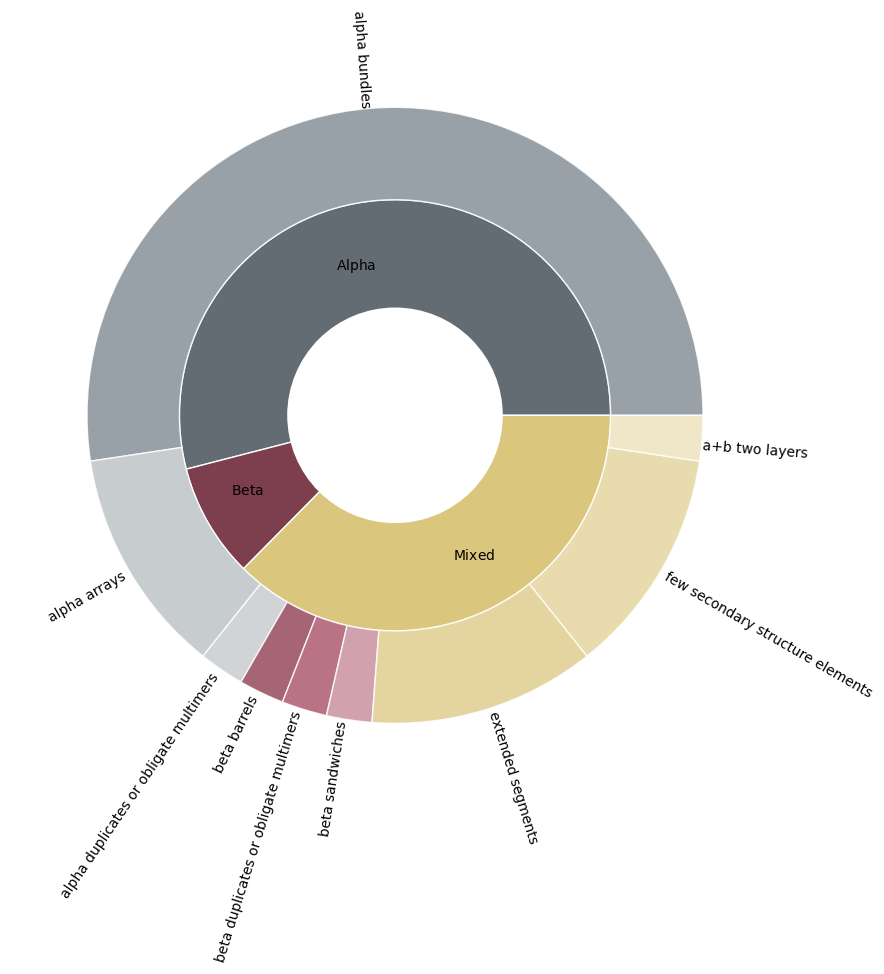

In [33]:
#plot nested pie chart with structural classes inside and ECOD annotations outside
#https://stackoverflow.com/questions/67210640/how-can-i-draw-a-nested-pie-graph-in-matplotlib-in-python

fig, ax = plt.subplots(figsize=(10, 10))

#inner pie
lables = [r"$\mathrm{Alpha}$", r"$\mathrm{Beta}$", r"$\mathrm{Mixed}$"]
sizes = [(len(all_alpha)/len(dn))*100, (len(all_beta)/len(dn))*100, (len(mixed)/len(dn))*100]
inner_colors = ["#626c72", "#7d3e4e", "#dac67c"]

ax.pie(sizes, labels=lables, radius=0.7, colors=inner_colors, rotatelabels=False, wedgeprops=dict(width=0.7, edgecolor='w'), pctdistance=0.5, labeldistance=0.7)

#outer pie
ecod_sizes = dn[dn["arch_name"].notna()]["arch_name"].value_counts().to_frame().reset_index()
ecod_sizes = ecod_sizes.rename(columns={"index": "arch_name", "arch_name": "count"})


ecod_sizes["class"] = [
    "Alpha",
    "Mixed",
    "Mixed",
    "Alpha",
    "Beta",
    "Mixed",
    "Alpha",
    "Beta",
    "Beta"
]

ecod_sizes = ecod_sizes.groupby(["class", "arch_name"]).sum()
ecod_sizes = ecod_sizes.reindex(ecod_sizes.groupby(level=0)["count"].sum().sort_values(ascending=False).index, level=0)
ecod_sizes = ecod_sizes.reset_index()
ecod_sizes = ecod_sizes.sort_values(by=["class", "count"], ascending=[True, False])
ecod_sizes = ecod_sizes.set_index(["class", "arch_name"])

ecod_lables = ecod_sizes.index.get_level_values(1).to_list()

alpha_colors = ["#869198", "#BDC3C7", "#C8CDD0"]
beta_colors = ["#964A5D", "#AE5B70", "#C992A0"]
mixed_colors = ["#E0CE90", "#E4D5A0", "#EDE3BF"]

inner_colors = alpha_colors + beta_colors + mixed_colors

ax.pie(ecod_sizes.values.flatten(), labels=ecod_lables, radius=1, rotatelabels=True, wedgeprops=dict(width=0.3, edgecolor='w', alpha=0.85), pctdistance=0.8, labeldistance=1.0, colors=inner_colors)



#center cirelcle
centre_circle = plt.Circle((0,0),radius=0.35,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

## Plot TM-score distributions again, but with high-pLDDT structures only

In [34]:
dn = dn[dn["max_pLDDT"] >= 70]
rd = rd[rd["max_pLDDT"] >= 70]
cons = cons[cons["pLDDT"] >= 70]

/var/folders/9x/smcwc3jj20b87jkkkrgmlz7c0000gn/T/ipykernel_45657/2384355814.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax_dn.set_ylim(0, 1400)


Text(0.5, 1.0, '$\\it{de}$ $\\it{novo}$ Proteins')

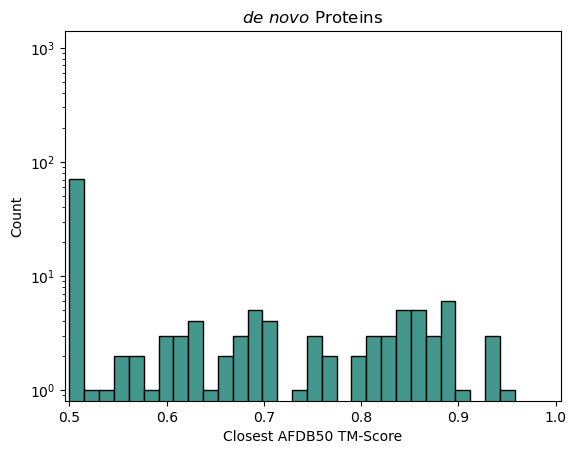

In [35]:
dn_fig = plt.figure()
ax_dn = dn_fig.add_subplot()

ax_dn.hist(dn["AFDB50_highest_Tm"], color="#43978D", bins=30, edgecolor="black",)
ax_dn.set_ylabel("Count")
ax_dn.set_xlabel("Closest AFDB50 TM-Score")

ax_dn.set_xlim(0.495, 1.005)


ax_dn.semilogy()

ax_dn.set_ylim(0, 1400)

ax_dn.set_title(r"$\it{de}$ $\it{novo}$ Proteins")

/var/folders/9x/smcwc3jj20b87jkkkrgmlz7c0000gn/T/ipykernel_45657/1530503161.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax_rd.set_ylim(0, 1400)


Text(0.5, 1.0, 'Random Sequences')

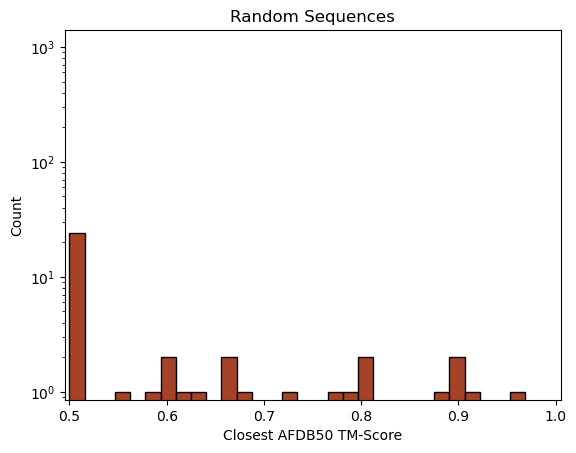

In [36]:
#Random proteins
rd_fig = plt.figure()
ax_rd = rd_fig.add_subplot()

ax_rd.hist(rd["AFDB50_highest_Tm"], color="#A44328", bins=30, edgecolor="black")
ax_rd.set_ylabel("Count")
ax_rd.set_xlabel("Closest AFDB50 TM-Score")

ax_rd.set_xlim(0.495, 1.005)

ax_rd.semilogy()

ax_rd.set_ylim(0, 1400)

ax_rd.set_title("Random Sequences")

/var/folders/9x/smcwc3jj20b87jkkkrgmlz7c0000gn/T/ipykernel_45657/3133093315.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax_con.set_ylim(0, 1400)


Text(0.5, 1.0, 'Conserved Proteins')

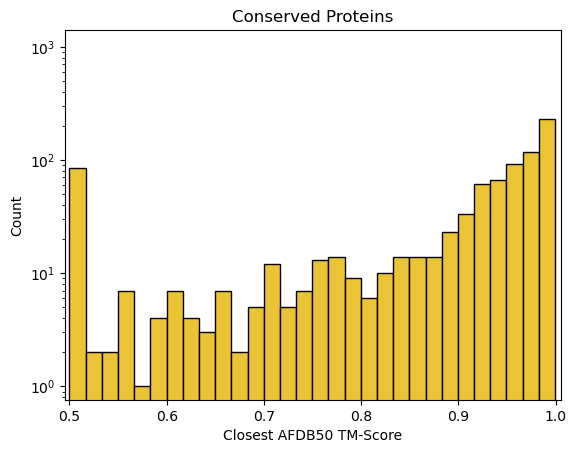

In [37]:
#Conserved proteins
con_fig  = plt.figure()
ax_con = con_fig.add_subplot()

ax_con.hist(cons["AFDB50_highest_Tm"], color="#EAC435", bins=30, edgecolor="black")
ax_con.set_ylabel("Count")
ax_con.set_xlabel("Closest AFDB50 TM-Score")

ax_con.set_xlim(0.495, 1.005)

ax_con.semilogy()

ax_con.set_ylim(0, 1400)

ax_con.set_title("Conserved Proteins")
